# Import All Neccessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score
)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import MiniBatchKMeans, KMeans, AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import hdbscan

# Import Dataset

In [40]:
dataset_BurnoutLevel = "C:/Users/Jia Xuan/Documents/FYP/synthetic-employee-dataset.json"

df2 = pd.read_json(dataset_BurnoutLevel)

# Data Understanding

In [47]:
numerical_cols = df2.select_dtypes(include=np.number).columns
categorical_cols = df2.select_dtypes(include=["object", "bool"]).columns

## Dataset Overview

In [44]:
df2.head()

,performance_score,satisfaction_score,project_completion_rate,overtime_hours,goal_achievement_rate,stress_level,burnout_risk
0,0.632482,0.623746,0.524187,0.00000,0.632482,0.908992,0.866643
1,0.538587,0.982556,0.558206,0.00000,0.538587,0.363321,0.218996
2,0.624656,0.767200,0.566849,0.00000,0.624656,0.664378,0.541531
3,0.959320,0.185888,0.767456,9.59168,0.959320,1.000000,1.000000
4,0.677305,0.566706,0.597235,0.00000,0.677305,0.723049,0.614825


## Dataset Structure Description

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849999 entries, 0 to 849998
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   performance_score        849999 non-null  float64
 1   satisfaction_score       849999 non-null  float64
 2   project_completion_rate  849999 non-null  float64
 3   overtime_hours           849999 non-null  float64
 4   goal_achievement_rate    849999 non-null  float64
 5   stress_level             849999 non-null  float64
 6   burnout_risk             849999 non-null  float64
dtypes: float64(7)
memory usage: 45.4 MB


## Summary Statistics

In [38]:
df2.describe()

,performance_score,satisfaction_score,project_completion_rate,overtime_hours,goal_achievement_rate,stress_level,burnout_risk
count,849999.000000,849999.000000,849999.000000,849999.000000,849999.000000,849999.000000,849999.000000
mean,0.692027,0.581941,0.595412,3.132903,0.692027,0.791048,0.735941
std,0.183911,0.276268,0.161173,6.094207,0.183911,0.264536,0.315756
min,0.074113,0.050000,0.059290,0.000000,0.074113,0.000000,0.000000
25%,0.571340,0.367016,0.490179,0.000000,0.571340,0.613005,0.479950
50%,0.699235,0.583188,0.609499,0.000000,0.699235,0.942151,0.914494
75%,0.825585,0.813912,0.716149,4.161240,0.825585,1.000000,1.000000
max,1.000000,1.000000,1.000000,73.953574,1.000000,1.000000,1.000000


In [43]:
# Columns that are just text descriptions or unique IDs
useless_cols = ['employee_id','department', 'role','job_level','tenure_months','salary',
                'workload_score','team_sentiment','recent_feedback', 
                'communication_patterns', 'training_participation','collaboration_score',
                'technical_skills', 'soft_skills', 'email_sentiment','slack_activity','meeting_participation',
                'turnover_reason', 'risk_factors_summary','turnover_probability_generated',
                'risk_factors_summary', 'persona_name','role_complexity_score','career_progression_score','left_company']

df2 = df2.drop(columns=useless_cols)

## Distribution Analysis for Numerical Features

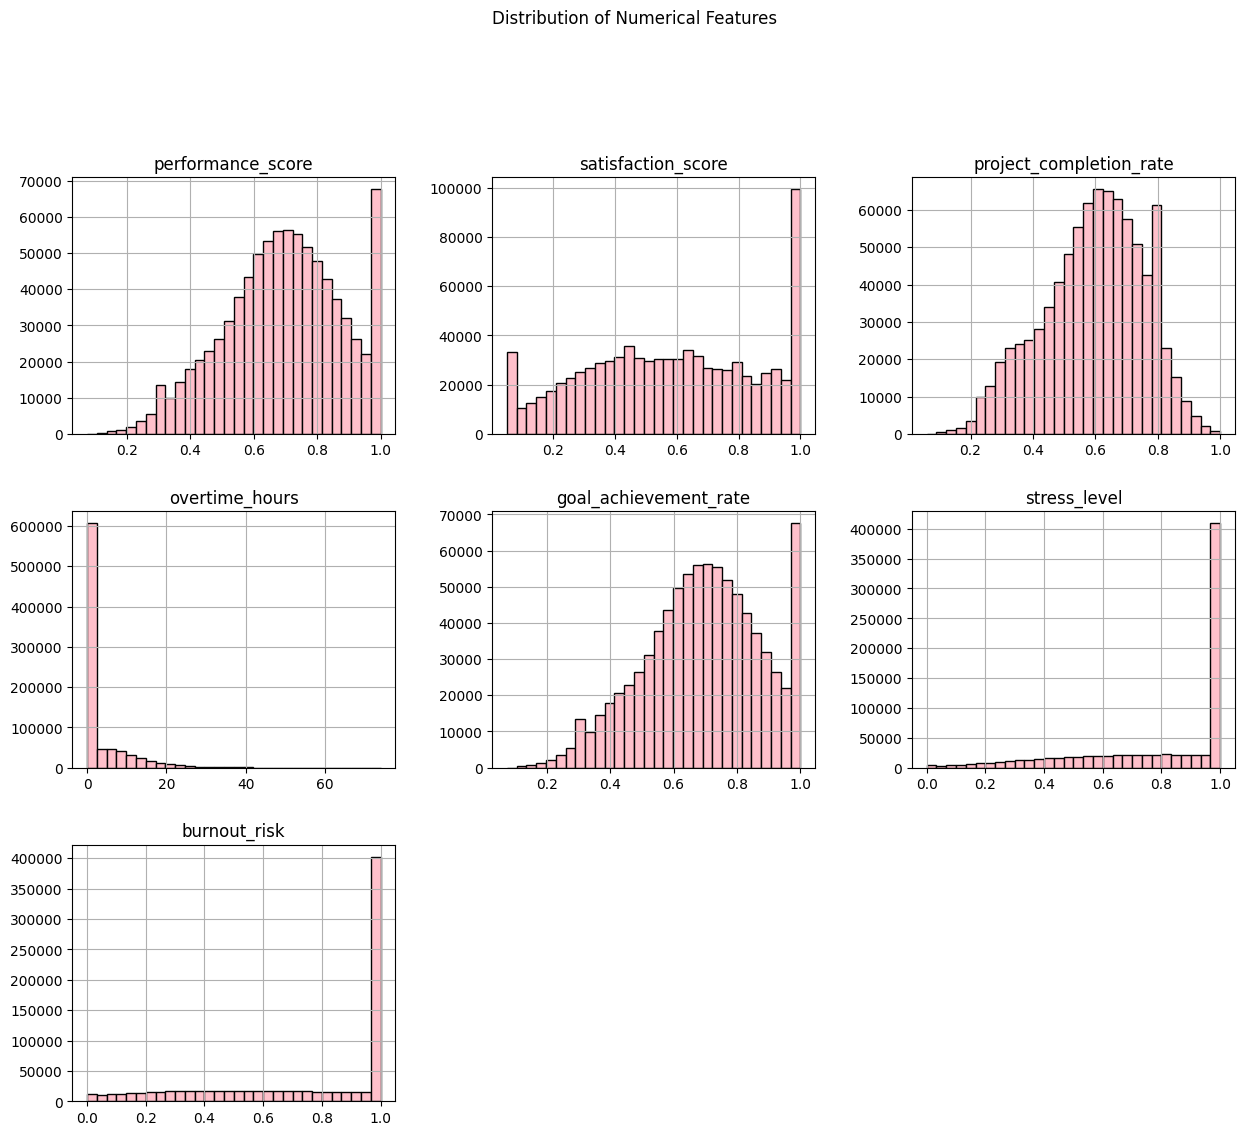

In [48]:
df2[numerical_cols].hist(
    figsize=(15, 12),
    bins=30,
    color='pink',
    edgecolor='black'
)

plt.suptitle("Distribution of Numerical Features", y=1.02)
plt.show()


## Corelation Analysis

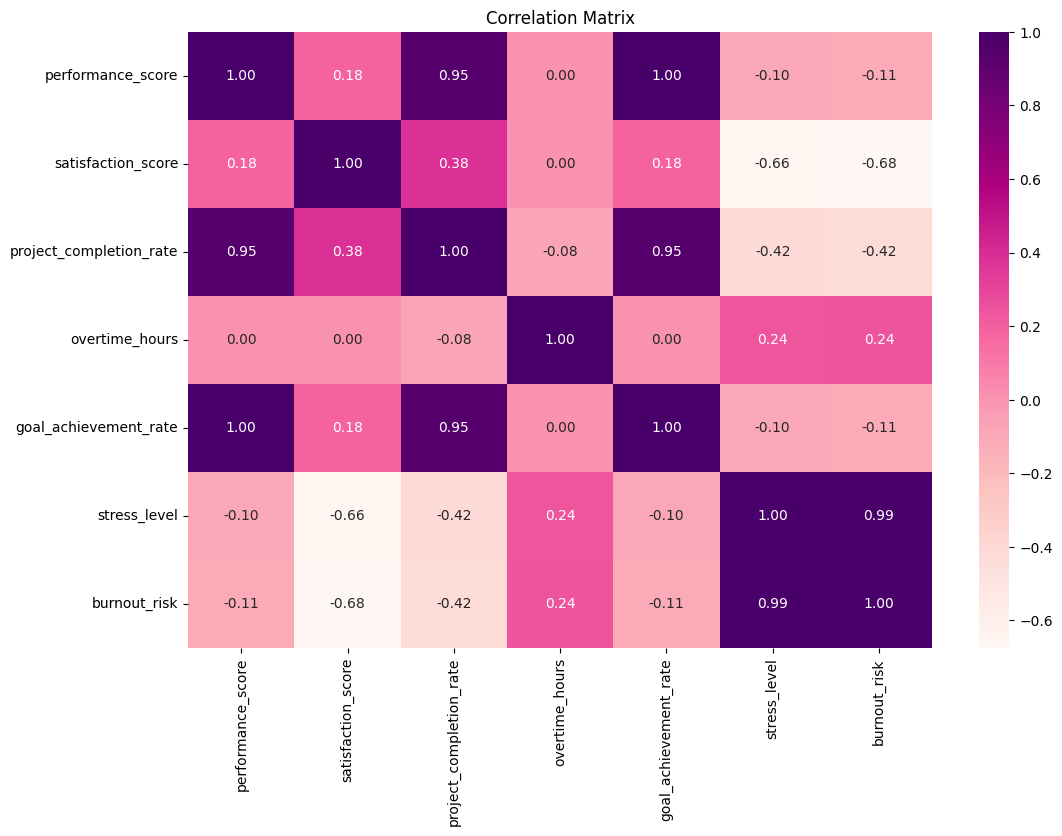

In [50]:
corr = df2[numerical_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdPu")
plt.title("Correlation Matrix")
plt.show()

## Data Quality Analysis

### Missing Value Analysis

In [51]:
df2.isnull().sum()

performance_score          0
satisfaction_score         0
project_completion_rate    0
overtime_hours             0
goal_achievement_rate      0
stress_level               0
burnout_risk               0
dtype: int64

### Outlier Analysis

In [52]:
numerical_cols = df2.select_dtypes(include=np.number).columns

outlier_count = []

for col in numerical_cols:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    count = ((df2[col] < lower) | (df2[col] > upper)).sum()
    
    outlier_count.append({
        "Column": col,
        "Number_of_Outliers": count
    })

iqr_outlier_df2 = pd.DataFrame(outlier_count)

iqr_outlier_df2.sort_values("Number_of_Outliers", ascending=False)


,Column,Number_of_Outliers
3,overtime_hours,102532
5,stress_level,4939
0,performance_score,2048
4,goal_achievement_rate,2048
2,project_completion_rate,1756
1,satisfaction_score,0
6,burnout_risk,0


### Duplicate Data Analysis

In [55]:
duplicate_rows = df2.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_rows}")

Number of Duplicate Rows: 0


# Data Preprocessing

## Drop duplicate rows

In [54]:
# Keep first occurrence (default)
df2 = df2.drop_duplicates(keep='first')

# Keep last occurrence
df2 = df2.drop_duplicates(keep='last')

## Outlier Handling

In [57]:
# --- Outliers BEFORE cleaning ---
Q1 = df2[numerical_cols].quantile(0.25)
Q3 = df2[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_before = ((df2[numerical_cols] < lower) | (df2[numerical_cols] > upper)).sum()

# --- Clip the outliers (IQR method) ---
for col in numerical_cols:
    df2[col] = np.clip(df2[col], lower[col], upper[col])

# --- Outliers AFTER cleaning ---
outliers_after = ((df2[numerical_cols] < lower) | (df2[numerical_cols] > upper)).sum()

# --- Comparison table ---
outlier_comparison = pd.DataFrame({
    'Before': outliers_before,
    'After': outliers_after
})

outlier_comparison


,Before,After
performance_score,2058,0
satisfaction_score,0,0
project_completion_rate,1760,0
overtime_hours,102210,0
goal_achievement_rate,2058,0
stress_level,4865,0
burnout_risk,0,0


In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 849252 entries, 0 to 849998
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   performance_score        849252 non-null  float64
 1   satisfaction_score       849252 non-null  float64
 2   project_completion_rate  849252 non-null  float64
 3   overtime_hours           849252 non-null  float64
 4   goal_achievement_rate    849252 non-null  float64
 5   stress_level             849252 non-null  float64
 6   burnout_risk             849252 non-null  float64
dtypes: float64(7)
memory usage: 51.8 MB


# Target Analysis

In [59]:
# Create a new column for Classification
def create_risk_category(score):
    if score < 0.4: return 'Low'
    elif score < 0.7: return 'Medium'
    else: return 'High'

df2['risk_label'] = df2['burnout_risk'].apply(create_risk_category)



print("Burnout Risk Distribution:")
print(df2['risk_label'].value_counts())
print(f"\nPercentage Distribution:")
print(df2['risk_label'].value_counts(normalize=True) * 100)

Burnout Risk Distribution:
risk_label
High      524935
Low       171065
Medium    153252
Name: count, dtype: int64

Percentage Distribution:
risk_label
High      61.811453
Low       20.143020
Medium    18.045527
Name: proportion, dtype: float64


In [60]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# 1. Define X and y
# Drop 'burnout_risk' (the numeric score) to avoid leakage
X = df2.drop(columns=['risk_label', 'burnout_risk','stress_level'])
y = df2['risk_label']

# 2. Initialize the Downsampler
rus = RandomUnderSampler(sampling_strategy='not minority', random_state=42)

# 3. Apply to the data
X_balanced, y_balanced = rus.fit_resample(X, y)

print(f"Balanced Dataset Distribution: {Counter(y_balanced)}")
# Each class should now have ~153,252 rows. Total: ~460k rows.

Balanced Dataset Distribution: Counter({'High': 153252, 'Low': 153252, 'Medium': 153252})


In [61]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Encode the labels (High, Medium, Low -> 0, 1, 2)
le = LabelEncoder()
y_encoded = le.fit_transform(y_balanced)

# 2. Split (with 460k rows, a 20% test set is still huge!)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 3. Train XGBoost
# objective='multi:softprob' is required for multiclass
xgb_class = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    objective='multi:softprob',
    num_class=3,
    random_state=42
)

xgb_class.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


              precision    recall  f1-score   support

        High       0.99      0.97      0.98     30650
         Low       0.99      0.97      0.98     30651
      Medium       0.95      0.98      0.96     30651

    accuracy                           0.97     91952
   macro avg       0.97      0.97      0.97     91952
weighted avg       0.97      0.97      0.97     91952



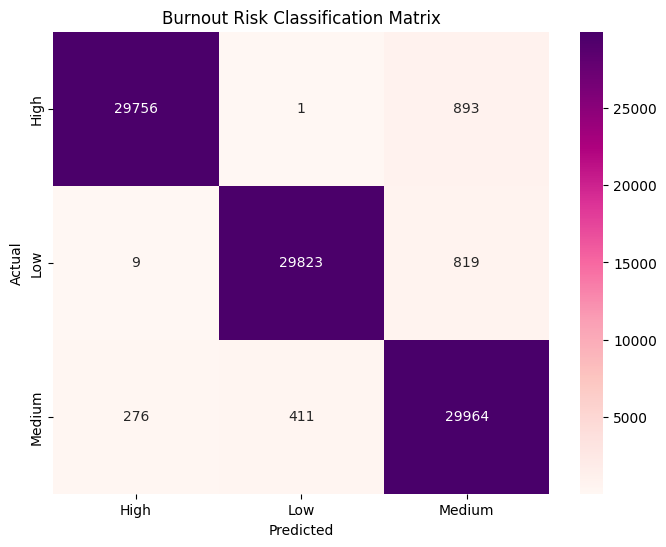

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = xgb_class.predict(X_test)

# Print report with class names back (High, Low, Medium)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='RdPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Burnout Risk Classification Matrix')
plt.show()

In [65]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define Target
y_reg = df2['performance_score']
X_reg = df2.drop(columns=['project_completion_rate', 'goal_achievement_rate','risk_label','burnout_risk'], errors='ignore')

# Split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train
reg_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
reg_model.fit(X_train_r, y_train_r)

# Evaluate
y_pred_r = reg_model.predict(X_test_r)
print(f"R-squared Score: {r2_score(y_test_r, y_pred_r):.4f}")

R-squared Score: 0.9999


# Models to predict Productivity Score

## Select Relevant Features

## Train Test Split

In [725]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

## Initialize 3 Models

In [726]:
model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)


## Baseline Regression Models

In [727]:
model_lr.fit(X_train_scaled, y_train)
model_rf.fit(X_train_imputed, y_train)
model_xgb.fit(X_train_imputed, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [728]:
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)


c:\Users\Jia Xuan\miniconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## Hyperparameter Tuning Model

### Random Forest

In [729]:
rf_param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

rf_grid.fit(X_train_imputed, y_train)

best_rf = rf_grid.best_estimator_


### XGBoost

In [730]:
xgb_param_grid = {
    "n_estimators": [200, 400],
    "learning_rate": [0.03, 0.05],
    "max_depth": [4, 6],
    "subsample": [0.8, 1.0],
}

xgb_grid = GridSearchCV(
    XGBRegressor(
        objective="reg:squarederror",
        random_state=42
    ),
    xgb_param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

xgb_grid.fit(X_train_imputed, y_train)

best_xgb = xgb_grid.best_estimator_


## Final Evaluation

In [731]:
y_pred_rf_tuned = best_rf.predict(X_test_imputed)
y_pred_xgb_tuned = best_xgb.predict(X_test_imputed)

tuned_results = [
    {
        "Model": "Random Forest (Tuned)",
        "MAE": mean_absolute_error(y_test, y_pred_rf_tuned),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned)),
        "R2": r2_score(y_test, y_pred_rf_tuned)
    },
    {
        "Model": "XGBoost (Tuned)",
        "MAE": mean_absolute_error(y_test, y_pred_xgb_tuned),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned)),
        "R2": r2_score(y_test, y_pred_xgb_tuned)
    }
]

final_results_df = pd.concat(
    [results_df, pd.DataFrame(tuned_results)],
    ignore_index=True
).sort_values("RMSE")

final_results_df


,Model,MAE,RMSE,R2
4,XGBoost (Tuned),0.820078,1.051673,0.658666
3,Random Forest (Tuned),0.822778,1.057269,0.655024
0,XGBoost,0.825734,1.060961,0.652610
1,Linear Regression,0.826141,1.063183,0.651154
2,Random Forest,0.836805,1.073249,0.644517


# Models to predict BurnOut Risks

## Feature and Target Selection

In [411]:
X = df2.drop(columns=['burnout_risk', 'Burnout_Level_1_10'])
# y is your categorical target ('low', 'medium', 'high')
y = df2['burnout_risk']

## Test Train Split

In [412]:
# 1. Split the data properly
# Use stratify=y to ensure low/medium/high are distributed evenly
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Feature Scaling

In [413]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [414]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

## Baseline Classification Models

### Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     30650
           1       0.99      0.97      0.98     30651
           2       0.95      0.98      0.96     30651

    accuracy                           0.97     91952
   macro avg       0.97      0.97      0.97     91952
weighted avg       0.97      0.97      0.97     91952



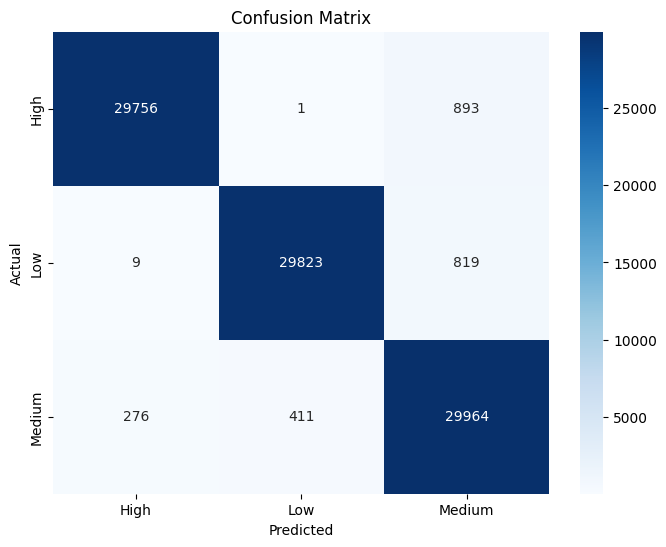

In [77]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Hyperparameter Tuning Model

### Randomized Search for Random Forest